In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("UNSW_NB15_training-set.csv").set_index('id')
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1


# Stage 1

In [3]:
# Data preprocessing

print("No. of cells missing data: ", df.isna().sum().sum() + df.isnull().sum().sum())
print("No. of duplicated rows: ", df.duplicated().sum())


No. of cells missing data:  0
No. of duplicated rows:  67601


There is no data missing.

In [4]:
# Drop the duplicates
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

# Label the labellable cols and scale the rest
le = LabelEncoder()
scalable_cols = []
for col in df.columns:
    if col == 'label' or col == 'id' or df[col].dtype == np.dtype("O"):
        df[col] = le.fit_transform(df[col])
    else:
        scalable_cols.append(col)

df[scalable_cols] = pd.DataFrame(StandardScaler().fit_transform(df[scalable_cols]), columns=scalable_cols)
df.set_index('id', inplace=True)
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
0,-0.223580,113,0,2,-0.139493,-0.190846,-0.060940,-0.131903,-0.331102,1.010875,...,-0.210847,-0.491429,-0.130326,-0.130326,-0.314421,-0.582585,-0.610714,-0.071304,6,0
1,-0.127877,113,0,2,-0.093361,0.058156,-0.058802,0.102349,-0.331064,-0.752046,...,-0.210847,-0.328989,-0.130326,-0.130326,-0.314421,-0.582585,0.196045,-0.071304,6,0
2,0.048383,113,0,2,-0.127960,-0.102963,-0.060464,-0.059044,-0.331616,-0.752046,...,-0.210847,-0.166549,-0.130326,-0.130326,-0.314421,-0.382076,0.196045,-0.071304,6,0
3,0.058980,113,3,2,-0.104894,-0.132257,-0.059279,-0.128555,-0.331620,-0.752046,...,-0.210847,-0.166549,7.398544,7.398544,-0.314421,-0.382076,-0.610714,-0.071304,6,0
4,-0.164180,113,0,2,-0.116427,-0.176199,-0.059701,-0.131365,-0.331451,1.029432,...,-0.210847,5.843741,-0.130326,-0.130326,-0.314421,-0.382076,5.520653,-0.071304,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107735,0.101118,113,9,2,0.252625,-0.000433,0.252305,-0.120930,-0.331276,-0.752046,...,-0.210847,-0.491429,-0.130326,-0.130326,-0.314421,2.826065,-0.610714,-0.071304,3,1
107736,0.427983,113,0,2,0.206494,2.269876,-0.048238,2.254789,-0.330804,-0.752046,...,-0.210847,-0.491429,-0.130326,-0.130326,-0.314421,-0.382076,-0.610714,-0.071304,3,1
107737,-0.065105,113,7,2,-0.058763,-0.000433,-0.057868,-0.039461,-0.331316,-0.752046,...,-0.210847,-0.491429,-0.130326,-0.130326,-0.314421,0.620468,-0.610714,-0.071304,3,1


In [5]:
# Feature Selection
corr_matrix = df.corr()
corr_with_target_feat = corr_matrix['label'].sort_values(ascending=False)
selected_features = corr_matrix[abs(corr_with_target_feat) > 0.5].index
selected_features

/tmp/ipykernel_109765/3209753376.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_features = corr_matrix[abs(corr_with_target_feat) > 0.5].index


Index(['sttl', 'ct_state_ttl', 'attack_cat', 'label'], dtype='object')

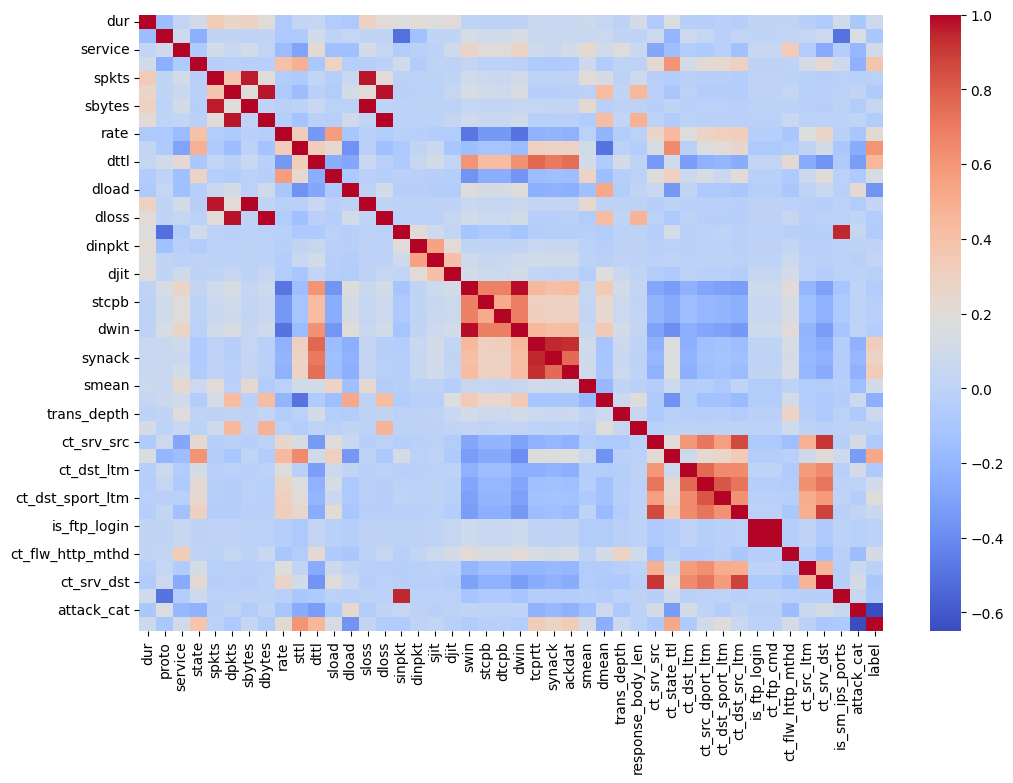

In [6]:
# Feature Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

### Data Resampling
When dealing with imbalanced datasets, Synthetic Minority Over-sampling Technique (SMOTE) is a popular approach. It works by creating synthetic samples from the minor class instead of creating copies, which helps overcome the overfitting problem.

In [7]:
# Generation of synthetic samples with SMOTE
X, y = df.drop('label', axis=1), df['label']
smote = SMOTE(random_state=42, k_neighbors=5)
X, y = smote.fit_resample(X, y)
df = pd.DataFrame(X, columns=X.columns)
df['label'] = y
print(df.label.value_counts())
df

label
0    55850
1    55850
Name: count, dtype: int64


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.223580,113,0,2,-0.139493,-0.190846,-0.060940,-0.131903,-0.331102,1.010875,...,-0.210847,-0.491429,-0.130326,-0.130326,-0.314421,-0.582585,-0.610714,-0.071304,6,0
1,-0.127877,113,0,2,-0.093361,0.058156,-0.058802,0.102349,-0.331064,-0.752046,...,-0.210847,-0.328989,-0.130326,-0.130326,-0.314421,-0.582585,0.196045,-0.071304,6,0
2,0.048383,113,0,2,-0.127960,-0.102963,-0.060464,-0.059044,-0.331616,-0.752046,...,-0.210847,-0.166549,-0.130326,-0.130326,-0.314421,-0.382076,0.196045,-0.071304,6,0
3,0.058980,113,3,2,-0.104894,-0.132257,-0.059279,-0.128555,-0.331620,-0.752046,...,-0.210847,-0.166549,7.398544,7.398544,-0.314421,-0.382076,-0.610714,-0.071304,6,0
4,-0.164180,113,0,2,-0.116427,-0.176199,-0.059701,-0.131365,-0.331451,1.029432,...,-0.210847,5.843741,-0.130326,-0.130326,-0.314421,-0.382076,5.520653,-0.071304,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111695,-0.173812,113,0,2,-0.116427,-0.161551,-0.059246,-0.130884,-0.331369,1.029432,...,-0.210847,0.423611,-0.130326,-0.130326,-0.314421,-0.107997,0.298195,-0.071304,6,0
111696,-0.162221,113,3,2,0.125764,0.175333,-0.048921,-0.111926,-0.329159,-1.039680,...,-0.210847,0.012294,7.398544,7.398544,-0.314421,0.460453,-0.610714,-0.071304,6,0
111697,-0.191981,113,0,2,-0.047230,-0.044374,-0.053036,-0.119351,-0.330236,-1.039680,...,-0.210847,-0.491429,-0.130326,-0.130326,-0.314421,-0.382076,0.196045,-0.071304,6,0
111698,-0.245396,119,2,0,-0.162559,-0.205493,-0.061515,-0.131959,-0.306405,-1.039680,...,-0.210847,-0.491429,-0.130326,-0.130326,-0.314421,-0.582585,-0.449362,-0.071304,6,0


###  Feature Space Reduction
After balancing the data, reducing the feature space is a good strategy to decrease computational complexity and potentially increase model accuracy. 

Techniques such as Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), or simply removing low-variance or highly-correlated features can be used.

In [8]:
# PCA
X, y = df.drop('label', axis=1), df['label']
pca = PCA(n_components=10)
X = pca.fit_transform(X)
df = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(X.shape[1])])
df['label'] = y
print(df.label.value_counts())
df

label
0    55850
1    55850
Name: count, dtype: int64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,-1.257888,-1.023937,-2.113765,0.391546,-0.817006,0.203541,0.280017,-0.106767,-0.122767,-0.192538,0
1,-1.310405,-1.947418,-0.941429,1.645830,1.118247,-2.026182,0.430454,-0.380831,-0.902657,0.820672,0
2,-1.292308,-0.479817,-2.533778,0.478417,0.623941,-1.469876,0.402270,-0.160776,0.662415,0.902059,0
3,-1.308465,1.638218,-0.157270,0.912561,-1.360825,-0.351319,0.595591,10.180928,0.804682,-1.760362,0
4,-1.338328,-3.925495,1.293724,-1.767276,2.671291,-4.686234,1.918873,-0.626196,-0.309192,-0.915806,0
...,...,...,...,...,...,...,...,...,...,...,...
111695,-1.287128,-0.990054,-2.090598,-0.848347,0.488737,-1.650297,0.888851,-0.263261,-0.220440,-0.565296,0
111696,-1.347438,1.727115,-0.030986,1.993700,-1.027307,-1.356669,1.151386,10.276123,-0.242465,-1.644705,0
111697,-1.268403,-1.329265,-1.399344,1.645757,-0.720205,-0.191079,0.564013,0.008550,-0.273320,0.230312,0
111698,-7.255763,-0.830688,0.483756,1.774489,-2.156199,1.898643,-0.172482,-0.231144,1.013844,-0.698278,0


# Stage 2

Commented out because it takes a while, and we have the sample result down there.

In [11]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# X = df.drop('label', axis=1)
# y = df['label']

# # Define base models
# model1 = LogisticRegression()
# model2 = KNeighborsClassifier()
# model3 = SVC()
# model4 = DecisionTreeClassifier()
# model5 = RandomForestClassifier()
# model6 = AdaBoostClassifier()
# model7 = GradientBoostingClassifier()

# # Define ensemble model
# ensemble = VotingClassifier(estimators=[('lr', model1), ('knn', model2), ('svc', model3), ('dt', model4), ('rf', model5), ('ab', model6), ('gb', model7)], voting='hard')

# # Define hyperparameters to tune
# params = {
#     'lr__C': [1, 10], 
#     'rf__n_estimators': [10, 50], 
#     'svc__C': [1, 10], 
#     'knn__n_neighbors': [3, 5, 7], 
#     'dt__max_depth': [None, 5, 10],
#     'ab__n_estimators': [50, 100],
#     'gb__n_estimators': [50, 100],
#     'gb__learning_rate': [0.1, 0.01]
# }

# # Perform grid search
# grid = GridSearchCV(estimator=ensemble, param_grid=params, cv=5)
# grid.fit(X, y)

# # Print best parameters
# print(grid.best_params_)

In [10]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# X = df.drop('label', axis=1)
# y = df['label']

# # Define base models
# model1 = LogisticRegression()
# model2 = KNeighborsClassifier()
# model3 = SVC()
# model4 = DecisionTreeClassifier()
# # ... Add more models

# # List of models
# models = [model1, model2, model3, model4]

# # Dictionary to hold model names and their scores
# scores = {}

# # Evaluate each model
# for model in models:
#     model_name = type(model).__name__
#     print(model_name)
#     score = cross_val_score(model, X, y, cv=2, scoring='accuracy').mean()
#     scores[model_name] = score

# # Sort models based on score
# sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# # Select top k models
# top_k = 4
# top_models = sorted_scores[:top_k]

# # Print top k models
# for i, (model_name, score) in enumerate(top_models):
#     print(f"Model {i+1}: {model_name}, Score: {score}")

LogisticRegression
KNeighborsClassifier
SVC
DecisionTreeClassifier
Model 1: KNeighborsClassifier, Score: 0.9687824529991047
Model 2: DecisionTreeClassifier, Score: 0.9515846016114593
Model 3: SVC, Score: 0.8483974932855864
Model 4: LogisticRegression, Score: 0.8337332139659803


In an example run:

- Model 1: KNeighborsClassifier, Score: `0.9687824529991047`
- Model 2: DecisionTreeClassifier, Score: `0.9515846016114593`
- Model 3: SVC, Score: `0.8483974932855864`
- Model 4: LogisticRegression, Score: `0.8337332139659803`

Using unseen data instances to evaluate the effectiveness of the ensemble model. 👇

In [16]:
# Preprocessing of the testing instances

df_test = pd.read_csv('UNSW_NB15_testing-set.csv').set_index('id')
print("No. of cells missing data: ", df_test.isna().sum().sum() + df_test.isnull().sum().sum())
print("No. of duplicated rows: ", df_test.duplicated().sum())

df_test.drop_duplicates(inplace=True)
df_test.reset_index(inplace=True)

le = LabelEncoder()
scalable_cols = []
for col in df_test.columns:
    if col == 'label' or col == 'id' or df_test[col].dtype == np.dtype("O"):
        df_test[col] = le.fit_transform(df_test[col])
    else:
        scalable_cols.append(col)

df_test[scalable_cols] = pd.DataFrame(StandardScaler().fit_transform(df_test[scalable_cols]), columns=scalable_cols)
df_test.set_index('id', inplace=True)

# PCA
X_test, y_test = df_test.drop('label', axis=1), df_test['label']
pca = PCA(n_components=10)
X_test = pca.fit_transform(X_test)
df_test = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])
df_test['label'] = y
print(df_test.label.value_counts())
df_test

No. of cells missing data:  0
No. of duplicated rows:  26387
label
0    46526
1     9419
Name: count, dtype: int64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,-6.363283,-2.376666,-0.822593,-0.232611,-1.506130,2.512662,0.956724,0.456757,-0.101956,0.780250,0
1,-6.381950,-2.762978,-0.491743,-0.541937,-1.334803,3.730117,1.418463,0.381936,-0.182777,0.864060,0
2,-6.377446,-3.030531,-0.455760,-0.484871,-1.405038,3.472069,1.515195,0.435987,-0.131735,0.855584,0
3,-6.375641,-2.966530,-0.429451,-0.391858,-1.310984,2.967526,1.238457,0.427142,-0.117498,0.828343,0
4,-6.389188,-2.910544,-0.282863,-0.558829,-1.094139,3.585299,1.252905,0.330983,-0.208980,0.862091,0
...,...,...,...,...,...,...,...,...,...,...,...
55940,-0.436584,0.805539,-2.841709,-0.872440,1.387406,-0.838217,-0.062771,-0.294589,-0.099513,0.571558,1
55941,-6.355379,-2.502916,-0.828326,-0.244800,-1.652095,2.589702,1.164145,0.501449,-0.053273,0.787957,1
55942,-0.436633,1.192118,-2.303236,-0.241809,1.871079,1.172218,-0.881185,-0.147466,-0.210925,0.197371,1
55943,-6.358088,-2.530056,-0.766985,-0.212805,-1.567157,2.383140,1.030289,0.492163,-0.051278,0.792110,1


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, y_train = df.drop('label', axis=1), df['label']
X_test, y_test = df_test.drop('label', axis=1), df_test['label']

# Consider Logistic Regression as some existing model
existing_model = LogisticRegression()
existing_model.fit(X_train, y_train)
existing_preds = existing_model.predict(X_test)

existing_accuracy = accuracy_score(y_test, existing_preds)
existing_precision = precision_score(y_test, existing_preds)
existing_recall = recall_score(y_test, existing_preds)
existing_f1 = f1_score(y_test, existing_preds)

print("\nExisting Model Performance:")
print("Accuracy:", existing_accuracy)
print("Precision:", existing_precision)
print("Recall:", existing_recall)
print("F1 Score:", existing_f1)


Existing Model Performance:
Accuracy: 0.5048529806059523
Precision: 0.2415314143527682
Recall: 0.9068903280603037
F1 Score: 0.38146700904320646


In [18]:
# Ensemble
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = SVC()
model4 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('lr', model1), ('knn', model2), ('svc', model3), ('dt', model4)], voting='hard')

ensemble.fit(X_train, y_train)
ensemble_preds = ensemble.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
ensemble_precision = precision_score(y_test, ensemble_preds)
ensemble_recall = recall_score(y_test, ensemble_preds)
ensemble_f1 = f1_score(y_test, ensemble_preds)

print("Ensemble Model Performance:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)

Ensemble Model Performance:
Accuracy: 0.6219680042899276
Precision: 0.28593327980144534
Recall: 0.8317231128569912
F1 Score: 0.4255642773718662
